Natural Language Processing is being used when you are processing text data like working on emails/ sms to mark them spam etc. Where you have a lot of documents containing text information and you want to process all of those to get your desired results. In that case you'll need to;
1. Compile Documents / Text Information
2. Featurize the Documents
3. Find Similarity in the Features

A simple way to featurize the documents is to featurize by using word count.
For example, we have 2 documents:
1. "Blue House"
2. "Red House"

Featurize based on word count:
1. "Blue House" -> (red, blue, house) -> (0,1,1)
2. "Red House" -> (red, blue, house) -> (1,0,1)


So here, we transformed Blue house into a vectorized word count based on the available features. 
#### Word Count:
We basically create a vector count of all the possible words through out all the documents in this case there is red, blue, house and then we count how many times those words occur in each document. 

#### Bag of words:
A document represented as a vector of word counts is called a "Bag of words"
"Blue House" -> (red, blue, house) -> (0,1,1)
"Red House" -> (red, blue, house) -> (1,0,1)

#### Similarity of the vectors:
We use the cosine similarity on the vectors made to determine their similarity:
    sim(A,B) = cos(theta) = (A.B)/(|A||B|)
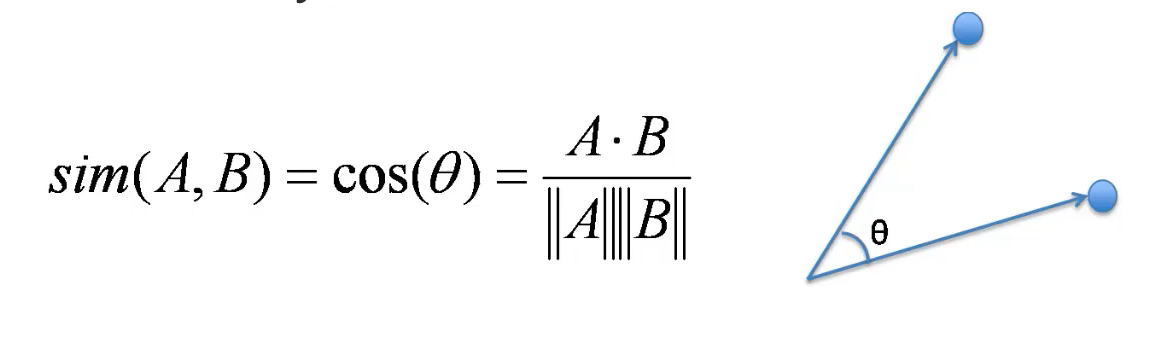
To featurize the document, we save the information about them in bag of words, or corpus.


This is very useful because we're treating each document as a vector of words and can perform vector operations like cos theta to find how much similar 2 documents are?


The simple technique of Bag of words can lead to some issue in case where certain words only occur in 1 document but not in other documents. To adjust the importance of words accross documents, we can imporve on Bag of Words by adjusting word counts based on their frequency in the <b>corpus</b>. We use the TF-IDF to imporve on Bag of Words.

#### Corpus
The group of all the documents.

#### TF-IDF:
TF-IDF stands for Term Frequency-Inverse Document Frequency. <br>Term Frequency is the importance of a term within the document itself. <br> TF(d,t) = Number of occurences of term t in document d<br>
Inverse Document Frequency is the importance of a term in the corpus.<br>
IDF(t) = log(D/t), where <br>
- D = total number of documents
- t = number of documents with the term

Mathematically, TF-IDF is then expressed:
Wx,y = tf(x,y) x log (N/dfx) <br>
where
-> x is term in document y<br>
-> tf(x,y) is importance/frequency of x in y<br>
-> N is total number of documents<br>
-> dfx is documents containing x
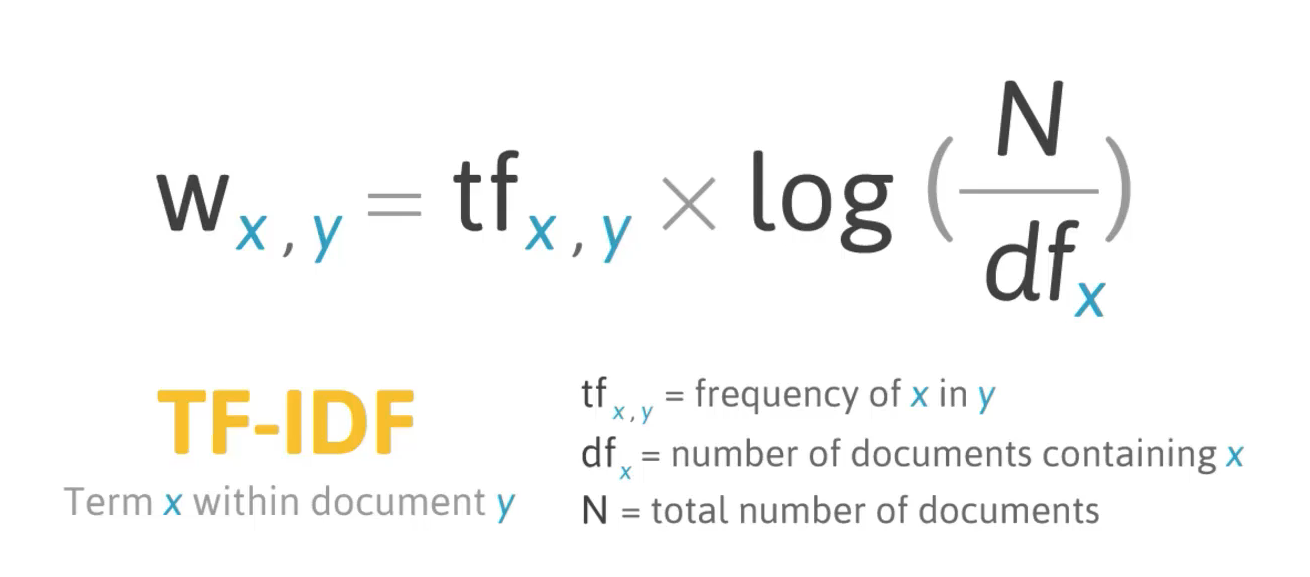




#### Tokenization:
Processing the text information into a list of tokens i.e. specific words without punctuation, stopwords etc. Tokens are the words we actually want.

#### Stemming:
Stemming is another very common way to process text data. It combines similar words showing you different versions of word. For example,   if you have 3 words running, ran & run, it converts all of them to run (since all have the same meta meaning).

#### Vectorization Steps:
Once we have processed the string in a list of tokens, we convert this message into a vector that Scikit Learn's model can work with. We convert each message into a vector that the machine learning model can understand.

We'll do that in three steps using <b>bag-of-words</b> model:
1. Count how many times the word occurs in each message (TF - Term Frequency: Importance of term within a doc)
2. Weigh the counts, so that frequent tokens get lower weight (INF - Inverse Document Frequency: The importance of a term in the corpus
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Each vector will have as many dimensions as there are unique words in the SMS corpus. We'll use scikit-learn's CountVectorizer to create a matrix of tokens. We can imagine here a 2 Dimensional matrix/df where the rows is equal to the number of unique words in the corpus(1-D is the entire vocabulary, 1 row per word and the columns are the messages (the other dimension are the actual documents i.e. columns=messages).

Because there are so many words and so many documents, we can expect the matrix can contain a lot of 0s. Scikit-learn is going to output a <b>Sparse Matrix</b>

#### Explaining the Log function in Inverse Document Frequency.
IDF = log (N / df)
where =>  total number of Documents
df = documents containing the word

Now, if N=100, the value of df can be in range 1<=df<=100.<br><br>
Case 1: Word is frequent accross all documents:<br>
    N=100 & df = 100, log (N/df) = log  (100/100) = log (1) = 0<br><br>
Case 2: Word is less frequent accross all documents:<br>
    N=100 & df = 50, log(N/df) = log (100/50) = log (2) = 0.3<br><br>
Case 3: Word is quite less frequent accross all documents:<br>
    N=100 & df= 20, log(N/df) = log(100/20) = log(5) = 0.69<br><br>
Case 3: Word has only 1 occurence:<br>
    N=100 & df = 1, log (N/df) = log (100/1) = log(100) = 2<br>
    
The more frequent the word is, the lower value for Inverse Document Frequency...


In [16]:
import math

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set_style('whitegrid')

In [19]:
log_list = [math.log10(abc) for abc in np.arange(0.9,5,0.1)]

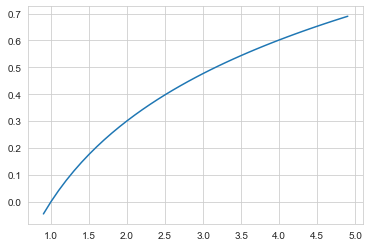

In [20]:
plt.plot(np.arange(0.9,5,0.1), log_list)